Simulator for boost charger

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ngspicelib

%qtconsole

In [53]:
namet='boost{}'

rdrain=10
rgen=1
l_v=np.geomspace(10e-6,1000e-6,100)
voutmax=np.empty(l_v.size)

In [54]:
for i in range(l_v.size):
    cirnamefile='data/'+namet.format(i)+'.cir'
    outnamefile='data/'+'out'+namet.format(i)+'.csv'
    
    l=l_v[i]
    tau=l/(rdrain+rgen)
    ton=2*tau
    tpulse=ton*1.1
    tsim=500e-6
    stepsim=tsim/10000
    
    cir=ngspicelib.Circuit(filename=cirnamefile,title='boost')
    cir.comment('####Import models####')
    cir.include('../models/diodes.mod')
    cir.include('../models/mos.mod')
    cir.comment('####CIRCUIT####')
    cir.comment('Input voltage with intrinsic resistence')
    cir.raw_write('vin gen 0 dc 3.3v')
    cir.raw_write('rgen gen in {}'.format(rgen))
    cir.raw_write('c1 in 0 10u')
    cir.raw_write('l1 in drain_ext {}'.format(str(l)))
    cir.raw_write('rdrain drain_ext drain {}'.format(rdrain))
    cir.x(p=['drain', 'gate', '0', '100'],subckt='mos_model1',name='nmos')
    cir.raw_write('rgate gate switch 10')
    cir.raw_write('dsch drain out schoideal')
    cir.raw_write('c2 out 0 10n')
    cir.raw_write('rl out 0 100k')
    cir.source('switch','0','pulse (0 3.3 0 0 0 {ton} {tpulse})'.format(ton=ton,tpulse=tpulse),name='switch')
    cir.sim_trans(stepsim,tsim)

    cir.begin_control()
    cir.run_control()
    cir.save(outnamefile,'in','out','switch','gate','drain','l1#branch')
    cir.end_control()
    
    print('Run',i,'stdout:',cir.run())
    
    df=pd.read_csv(outnamefile,header=0,delim_whitespace=True)
    voutmax=np.max(df['v(out)'])

Run 0 stdout: None
Run 1 stdout: None
Run 2 stdout: None
Run 3 stdout: None
Run 4 stdout: None
Run 5 stdout: None
Run 6 stdout: None
Run 7 stdout: None
Run 8 stdout: None
Run 9 stdout: None
Run 10 stdout: None
Run 11 stdout: None
Run 12 stdout: None
Run 13 stdout: None
Run 14 stdout: None
Run 15 stdout: None
Run 16 stdout: None
Run 17 stdout: None
Run 18 stdout: None
Run 19 stdout: None
Run 20 stdout: None
Run 21 stdout: None
Run 22 stdout: None
Run 23 stdout: None
Run 24 stdout: None
Run 25 stdout: None
Run 26 stdout: None
Run 27 stdout: None
Run 28 stdout: None
Run 29 stdout: None
Run 30 stdout: None
Run 31 stdout: None
Run 32 stdout: None
Run 33 stdout: None
Run 34 stdout: None
Run 35 stdout: None
Run 36 stdout: None
Run 37 stdout: None
Run 38 stdout: None
Run 39 stdout: None
Run 40 stdout: None
Run 41 stdout: None
Run 42 stdout: None
Run 43 stdout: None
Run 44 stdout: None
Run 45 stdout: None
Run 46 stdout: None
Run 47 stdout: None
Run 48 stdout: None
Run 49 stdout: None
Run 50 std

<ErrorbarContainer object of 3 artists>

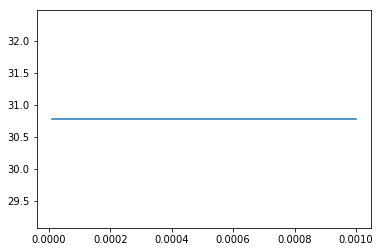

In [56]:
plt.errorbar(x=l_v,y=voutmax)